# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xYMQe_6GKus4q8E6c5RNIS&si=QtTWrQUAXDgwhxBp >}}

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt 
import seaborn as sns

In [91]:
import warnings
warnings.filterwarnings("ignore")

# 3. Data

In [102]:
def generating_df(n_balance):
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [110]:
df = generating_df(10)
df

,toeic,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
0,135,0.051535,0,0.184517,0.415330,-0.686366,-1.819431,-1.173594,-1.215262,-1.610389,-0.820352,0.449367,0.725023
1,935,0.355496,0,-0.632594,-0.664892,0.211959,-0.958648,1.242596,-2.303714,-1.450162,-0.295893,-0.212096,0.526111
2,485,2.228435,0,1.165994,-0.756352,-0.777127,-0.643733,1.051517,1.899984,2.451968,0.294510,-1.462545,-0.397320
3,65,1.179701,0,-0.373464,-0.175916,-0.096167,1.362542,1.285671,2.568078,-0.706288,0.033109,-0.022258,-0.127342
4,445,3.962356,1,0.118567,1.506343,0.265080,-0.488586,-0.354807,-0.715808,0.868123,1.744717,0.101916,0.025840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,280,4.288465,1,0.310288,1.199902,0.278003,0.079322,1.518781,0.108520,1.877523,0.571970,0.765288,0.472346
496,310,2.601212,1,-0.869109,-1.798781,-0.801852,-0.304045,0.413868,1.303797,2.261232,-1.036498,-0.540375,1.263321
497,225,0.042323,0,-0.065514,-0.133791,2.126346,-1.352515,0.296947,-0.893480,0.569711,0.139151,-0.643992,0.126148
498,320,1.041416,0,-0.927475,1.515043,1.626494,0.322667,1.016824,1.055700,-1.795255,0.497891,-1.101028,-1.164185


In [111]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [112]:
X,y = df_train.drop(['employment'],axis=1), df_train['employment']
XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']

# 4. 분석

`-` 분석1: 의사결정나무

In [113]:
## step1 -- pass
## step2 
predictr = sklearn.tree.DecisionTreeClassifier(random_state=42)
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 1.0000
test_score = 0.7571


`-` 분석2: 로지스틱 + Ridge

In [115]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l2')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8800
test_score = 0.8800


`-` 분석3: 로지스틱 + Lasso 

In [117]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8667
test_score = 0.8857


# 5. 연구

`-` Balance 변수들의 수가 커짐에 따라서 각 방법들(의사결정나무, 로지스틱+Ridge, 로지스틱+Lasso)의 train/test score는 어떻게 변화할까? 

`-` df, predictor -> train_score, test_score 와 같은 함수를 만들자. 

In [118]:
def anal(df,predictr):
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)
    X,y = df_train.drop(['employment'],axis=1), df_train['employment']
    XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']
    ## step1 -- pass
    ## step2 -- pass 
    ## step3 
    predictr.fit(X,y)
    ## step4 -- pass 
    #--#
    return predictr.score(X,y),predictr.score(XX,yy)

In [119]:
predictr = sklearn.tree.DecisionTreeClassifier()

In [121]:
anal(df,predictr)

(1.0, 0.7657142857142857)

`-` 실험해보자. 

In [127]:
n_balance_lst = range(0,5000,50)

In [124]:
predictrs = [sklearn.tree.DecisionTreeClassifier(random_state=42),
             sklearn.linear_model.LogisticRegressionCV(penalty='l2'),
             sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')]

In [128]:
lst = [[anal(generating_df(n_balance),predictr) for predictr in predictrs] for n_balance in n_balance_lst]

`-` 실험결과 정리 

In [133]:
arr = np.array(lst)
tr = arr[:,:,0]
tst = arr[:,:,1]

In [149]:
df1= pd.DataFrame(tr,columns=['tree','ridge','lasso']).eval('dataset = "train"').eval('n_balance = @n_balance_lst')
df2= pd.DataFrame(tst,columns=['tree','ridge','lasso']).eval('dataset = "test"').eval('n_balance = @n_balance_lst')
result_df = pd.concat([df1,df2]).set_index(['dataset','n_balance']).stack().reset_index().set_axis(['dataset','n_balance','method','score'],axis=1)

<Axes: xlabel='n_balance', ylabel='score'>

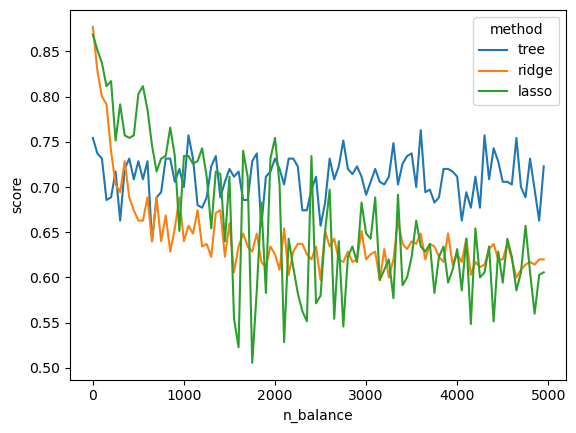

In [153]:
sns.lineplot(result_df.query('dataset=="test"'),x='n_balance',y='score',hue='method')